# Lab 1 Analysis Example using Thicket

In [1]:
import sys
sys.path.append("/scratch/group/csce435-f23/python-3.8.17/lib/python3.8/site-packages")
sys.path.append("/scratch/group/csce435-f23/thicket")
from glob import glob

import matplotlib.pyplot as plt
import pandas as pd

import thicket as th

pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

Read in all the files

In [2]:
tk_sorted_MPI = th.Thicket.from_caliperreader(glob("MPI-*-Sorted.cali"))
tk_random_MPI = th.Thicket.from_caliperreader(glob("MPI-*-Random.cali"))
tk_reverse_MPI = th.Thicket.from_caliperreader(glob("MPI-*-ReverseSorted.cali"))
tk_perturbed_MPI = th.Thicket.from_caliperreader(glob("MPI-*-perturbed.cali"))
# test = th.Thicket.from_caliperreader(glob("p16-s16777216-random.cali"))
tks_MPI = [tk_sorted_MPI,tk_random_MPI,tk_reverse_MPI,tk_perturbed_MPI]

In [25]:
tk_sorted_CUDA = th.Thicket.from_caliperreader(glob("CUDA-*-sorted.cali"))
tk_random_CUDA = th.Thicket.from_caliperreader(glob("CUDA-*-random.cali"))
tk_reverse_CUDA = th.Thicket.from_caliperreader(glob("CUDA-*-reverse_sorted.cali"))
tk_perturbed_CUDA = th.Thicket.from_caliperreader(glob("CUDA-*-perturbed.cali"))
# test = th.Thicket.from_caliperreader(glob("p16-s16777216-random.cali"))
tks_CUDA = [tk_sorted_CUDA,tk_random_CUDA,tk_reverse_CUDA,tk_perturbed_CUDA]

In [28]:
tk_random_MPI.dataframe

nid  \
node                                              profile           
{'name': 'main', 'type': 'function'}              175875183     1   
                                                  550995491     1   
                                                  686103513     1   
                                                  700334060     1   
                                                  1222811351    1   
                                                  1235658381    1   
                                                  1661978756    1   
                                                  1933489635    1   
                                                  2081762104    1   
                                                  2435272956    1   
                                                  2849317879    1   
                                                  2860635818    1   
                                                  2899610179    1   
                                                  2966744565    1   
                                                  3131990927    1   
                                                  3944796942    1   
                                                  4201150477    1   
                                                  4289726238    1   
{'name': 'MPI_init', 'type': 'function'}          175875183     2   
                                                  550995491     2   
                                                  686103513     2   
                                                  700334060     2   
                                                  1222811351    2   
                                                  1235658381    2   
                                                  1661978756    2   
                                                  1933489635    2   
                                                  2081762104    2   
                                                  2435272956    2   
                                                  2849317879    2   
                                                  2860635818    2   
                                                  2899610179    2   
                                                  2966744565    2   
                                                  3131990927    2   
                                                  3944796942    2   
                                                  4201150477    2   
                                                  4289726238    2   
{'name': 'comm', 'type': 'function'}              175875183     4   
                                                  550995491     4   
                                                  686103513     4   
                                                  700334060     4   
                                                  1222811351    4   
                                                  1235658381    4   
                                                  1661978756    4   
                                                  1933489635    4   
                                                  2081762104    4   
                                                  2435272956    4   
                                                  2849317879    4   
                                                  2860635818    4   
                                                  2899610179    4   
                                                  2966744565    4   
                                                  3131990927    4   
                                                  3944796942    4   
                                                  4201150477    4   
                                                  4289726238    4   
{'name': 'MPI_Barrier', 'type': 'function'}       175875183     6   
                                                  550995491     6   
                                                  686103513 

In [8]:
tk_random_MPI.statsframe.dataframe["time"] = 1
print(tk_random_MPI.tree())

  _____ _     _      _        _   
 |_   _| |__ (_) ___| | _____| |_ 
   | | | '_ \| |/ __| |/ / _ \ __|
   | | | | | | | (__|   <  __/ |_ 
   |_| |_| |_|_|\___|_|\_\___|\__|  v2023.3.0

1.000 main
├─ 1.000 MPI_init
├─ 1.000 comm
│  ├─ 1.000 MPI_Barrier
│  ├─ 1.000 MPI_Gather
│  ├─ 1.000 MPI_Probe
│  ├─ 1.000 comm_large
│  │  ├─ 1.000 MPI_Recv
│  │  └─ 1.000 MPI_Send
│  └─ 1.000 comm_small
│     └─ 1.000 MPI_Get_Count
├─ 1.000 comp
│  └─ 1.000 comp_large
├─ 1.000 correctness_check
└─ 1.000 data_init

Legend (Metric: time Min: 1.00 Max: 1.00)
█ 1.00 - 1.00
█ 1.00 - 1.00
█ 1.00 - 1.00
█ 1.00 - 1.00
█ 1.00 - 1.00
█ 1.00 - 1.00

name User code    ◀  Only in left graph    ▶  Only in right graph



In [9]:
gbs_MPI = []
for tk in tks_MPI:
    gbs_MPI.append(tk.groupby("InputSize"))

3  thickets created...
{65536: <thicket.thicket.Thicket object at 0x2b890500aca0>, 262144: <thicket.thicket.Thicket object at 0x2b89053b2dc0>, 1048576: <thicket.thicket.Thicket object at 0x2b8905322550>}
3  thickets created...
{65536: <thicket.thicket.Thicket object at 0x2b89053a7df0>, 262144: <thicket.thicket.Thicket object at 0x2b89053ccc10>, 1048576: <thicket.thicket.Thicket object at 0x2b89053b0820>}
3  thickets created...
{65536: <thicket.thicket.Thicket object at 0x2b89053054c0>, 262144: <thicket.thicket.Thicket object at 0x2b8905305580>, 1048576: <thicket.thicket.Thicket object at 0x2b8905135340>}
3  thickets created...
{65536: <thicket.thicket.Thicket object at 0x2b8905295af0>, 262144: <thicket.thicket.Thicket object at 0x2b8905195fd0>, 1048576: <thicket.thicket.Thicket object at 0x2b8904ffc730>}


In [29]:
gbs_CUDA = []
for tk in tks_CUDA:
    gbs_CUDA.append(tk.groupby("InputSize"))

1  thickets created...
{65536: <thicket.thicket.Thicket object at 0x2b890c2218b0>}
6  thickets created...
{65536: <thicket.thicket.Thicket object at 0x2b890c1f5430>, 262144: <thicket.thicket.Thicket object at 0x2b8907f9ef10>, 1048576: <thicket.thicket.Thicket object at 0x2b8907f9e250>, 4194304: <thicket.thicket.Thicket object at 0x2b890c6a5cd0>, 16777216: <thicket.thicket.Thicket object at 0x2b890c6a5790>, 67108864: <thicket.thicket.Thicket object at 0x2b890c499e50>}
1  thickets created...
{65536: <thicket.thicket.Thicket object at 0x2b890c8c3130>}
5  thickets created...
{65536: <thicket.thicket.Thicket object at 0x2b890c7f4760>, 262144: <thicket.thicket.Thicket object at 0x2b8907f91670>, 1048576: <thicket.thicket.Thicket object at 0x2b890c17b880>, 4194304: <thicket.thicket.Thicket object at 0x2b890c157100>, 16777216: <thicket.thicket.Thicket object at 0x2b8907e6fdc0>}


Compose these 3 groups column-wise to get a holistic view of the data

In [30]:
concats_MPI = []

for g in gbs_MPI:
    concats_MPI.append(th.Thicket.concat_thickets(
        thickets=list(g.values()),
        headers=list(g.keys()),
        axis="columns",
        metadata_key="num_procs"
    ))

In [37]:
concats_CUDA = []

for g in gbs_CUDA:
    concats_CUDA.append(th.Thicket.concat_thickets(
        thickets=list(g.values()),
        headers=list(g.keys()),
        axis="columns",
        metadata_key="num_threads"
    ))

Perform pandas operations to get the table in a desirable format for plotting

In [11]:
# Drop unwanted columns
column_name_to_drop = ['nid','spot.channel','Total time','Min time/rank','Avg time/rank','Variance time/rank','Retiring','Backend bound','Frontend bound','Bad speculation']
# column_name_to_drop = ['nid','spot.channel']
# ctk.dataframe.reset_index()

for ctk in concats_MPI:
    for level in ctk.dataframe.columns.levels[0]:
        # Check if the column exists in this level
        for c in column_name_to_drop:
            if (level, c) in ctk.dataframe.columns:
                ctk.dataframe = ctk.dataframe.drop((level, c), axis=1)

    # Drop unwanted columns
    ctk.dataframe = ctk.dataframe.reset_index().drop(("node", ""), axis=1)
    # Rename index to remove tuple
    ctk.dataframe = ctk.dataframe.rename({("name", ""): "name", ("num_procs", ""): "num_procs"}).set_index(["name", "num_procs"])
    # ctk.dataframe.columns = ctk.dataframe.columns.droplevel(1)
    # Drop "time" label as it is redundant
    ctk_MPI = ctk
    ctk_MPI.dataframe

In [38]:
# Drop unwanted columns
column_name_to_drop = ['nid','spot.channel','Total time','Min time/rank','Avg time/rank','Variance time/rank']
# column_name_to_drop = ['nid','spot.channel']
# ctk.dataframe.reset_index()

for ctk in concats_CUDA:
    for level in ctk.dataframe.columns.levels[0]:
        # Check if the column exists in this level
        for c in column_name_to_drop:
            if (level, c) in ctk.dataframe.columns:
                ctk.dataframe = ctk.dataframe.drop((level, c), axis=1)

    # Drop unwanted columns
    ctk.dataframe = ctk.dataframe.reset_index().drop(("node", ""), axis=1)
    # Rename index to remove tuple
    ctk.dataframe = ctk.dataframe.rename({("name", ""): "name", ("num_threads", ""): "num_threads"}).set_index(["name", "num_threads"])
    # ctk.dataframe.columns = ctk.dataframe.columns.droplevel(1)
    # Drop "time" label as it is redundant
    ctk_CUDA = ctk
    ctk_CUDA.dataframe

In [22]:
ctk_MPI = concats_MPI[3]
ctk_MPI.dataframe

65536        262144       1048576
                            Max time/rank Max time/rank Max time/rank
name              num_procs                                          
main              2              0.516300      0.674911      3.306110
                  4              0.936159      1.263579      5.683485
                  8              1.711414      2.401706      9.490219
                  16             3.377055      3.447204     11.264750
                  32             7.649847           NaN           NaN
                  64                  NaN     11.965882           NaN
MPI_init          2              0.442442      0.467094      0.421839
                  4              0.770751      0.873040      0.764290
                  8              1.489714      1.694592      1.287643
                  16             2.814890      2.661076      2.939416
                  32             6.099699           NaN           NaN
                  64                  NaN     10.133005           NaN
comm              2              0.038742      0.038143      0.072312
                  4              0.120228      0.111601      0.109722
                  8              0.167226      0.198534      0.279540
                  16             0.461592      0.461642      0.626154
                  32             0.882431           NaN           NaN
                  64                  NaN      1.350590           NaN
MPI_Barrier       2              0.025734      0.037077      0.033157
                  4              0.119278      0.086629      0.074634
                  8              0.166790      0.145931      0.184522
                  16             0.317162      0.336721      0.294921
                  32             0.814206           NaN           NaN
                  64                  NaN      0.645198           NaN
MPI_Gather        2              0.026688      0.015110      0.032009
                  4              0.058260      0.040553      0.061820
                  8              0.086721      0.090083      0.087665
                  16             0.087827      0.191620      0.065569
                  32             0.276474           NaN           NaN
                  64                  NaN      0.227715           NaN
MPI_Probe         2              0.000450      0.000113      0.020532
                  4              0.000494      0.027388      0.037359
                  8              0.033960      0.063972      0.098127
                  16             0.160784      0.134422      0.396554
                  32             0.133978           NaN           NaN
                  64                  NaN      0.956161           NaN
comm_large        2              0.000112      0.000342      0.000696
                  4              0.000135      0.000313      0.011083
                  8              0.000123      0.000374      0.001146
                  16             0.000133      0.028178      0.057920
                  32             0.000152           NaN           NaN
                  64                  NaN      0.029154           NaN
MPI_Recv          2              0.000031      0.000173      0.000428
                  4              0.000038      0.000165      0.010678
                  8              0.000035      0.000185      0.000463
                  16             0.000034      0.000175      0.000781
                  32             0.000050           NaN           NaN
                  64                  NaN      0.028999           NaN
MPI_Send          2              0.000028      0.000110      0.000199
                  4              0.000047      0.000088      0.000304
                  8              0.000040      0.000127      0.000616
                  16             0.000053      0.000091      0.057044
                  32             0.000063           NaN           NaN
                  64                  NaN      0.000094           NaN
comm_small        2              0.000044     

In [40]:
ctk_CUDA = concats_CUDA[1]
ctk_CUDA.dataframe

65536                    \
                                 Max time/rank Avg GPU time/rank   
name                 num_threads                                   
main                 64               0.442328          0.029542   
                     128              0.407955          0.044224   
                     256              0.423944          0.048115   
                     512              0.297971          0.047973   
                     1024             0.410082          0.049820   
comm                 64               0.404213          0.001101   
                     128              0.355558          0.001036   
                     256              0.367534          0.001095   
                     512              0.240454          0.001148   
                     1024             0.352027          0.001067   
comm_large           64               0.402027          0.001028   
                     128              0.353539          0.000949   
                     256              0.365378          0.000991   
                     512              0.238096          0.001072   
                     1024             0.349916          0.000975   
cudaMemcpy           64               0.401484          0.001028   
                     128              0.353054          0.000949   
                     256              0.364874          0.000991   
                     512              0.237519          0.001072   
                     1024             0.349407          0.000975   
comm_small           64               0.001474          0.000073   
                     128              0.001400          0.000087   
                     256              0.001496          0.000105   
                     512              0.001611          0.000077   
                     1024             0.001446          0.000092   
cudaMemcpyFromSymbol 64               0.000973          0.000073   
                     128              0.000955          0.000087   
                     256              0.001034          0.000105   
                     512              0.001086          0.000077   
                     1024             0.000985          0.000092   
comp                 64               0.029910          0.028441   
                     128              0.044571          0.043188   
                     256              0.048489          0.047020   
                     512              0.048466          0.046824   
                     1024             0.050191          0.048752   
comp_large           64               0.029383          0.028441   
                     128              0.044103          0.043188   
                     256              0.048007          0.047020   
                     512              0.047903          0.046824   
                     1024             0.049708          0.048752   
correctness_check    64               0.000192               NaN   
                     128              0.000197               NaN   
                     256              0.000194               NaN   
                     512              0.000195               NaN   
                     1024             0.000195               NaN   
data_init            64               0.001528               NaN   
                     128              0.001454               NaN   
                     256              0.001468               NaN   
                     512              0.001452               NaN   
                     1024             0.001455               NaN   

                                                                      \
                                 Min GPU time/rank Max GPU time/rank   
name                 num_threads                                       
main                 64                   0.029542          0.029542   
                     128                  0.044224          0.044224   
                     256                  0.048115          0.048115   
    

In [23]:
# Define common variables
function_names_MPI = set(ctk_MPI.dataframe.index.get_level_values("name"))
procs_MPI = sorted(list(set(ctk_MPI.dataframe.index.get_level_values("num_procs"))))
vals_MPI = sorted(ctk_MPI.dataframe.columns.tolist())

In [42]:
# Define common variables
function_names_CUDA = set(ctk_CUDA.dataframe.index.get_level_values("name"))
procs_CUDA = sorted(list(set(ctk_CUDA.dataframe.index.get_level_values("num_threads"))))
vals_CUDA = sorted(ctk_CUDA.dataframe.columns.tolist())


# Plotting

### Option 1
Use `pandas.DataFrame.plot` to automatically interface with matplotlib

In [15]:
def plot_pandas(df, title, xlabel, ylabel, loglog):
    plot = df.plot(kind="line", 
        marker='o', 
        title=title, 
        xlabel=xlabel,
        ylabel=ylabel, 
        grid=True,
        loglog=loglog
    )
    return plot

### Option 2
Use `matplotlib.pyplot` directly for more fine-grained control. Specifically for our case we can change the x axis scaling from base 10 to base 2.

In [16]:
def plot_mpl(df, title, xlabel, ylabel):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.plot(
        df,
        marker='o',
    )
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.legend(matrix_sizes)
    plt.grid(True)
    plt.yscale("log", base=10)
    plt.xscale("log", base=2)
    plt.xticks(threads)
    plt.show()
    return fig, ax

# Examples

## time

In [17]:
ctk_MPI.dataframe.loc["main",[(65536,'Max time/rank')]]
for i in ctk_MPI.dataframe.columns:
    print(i)

(65536, 'Max time/rank')
(262144, 'Max time/rank')
(1048576, 'Max time/rank')


/scratch/group/csce435-f23/python-3.8.17/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:509: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = self.plt.figure(figsize=self.figsize)


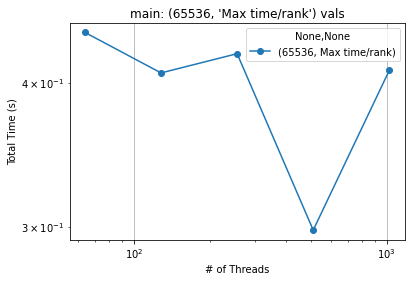

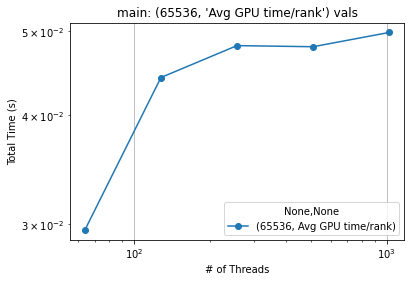

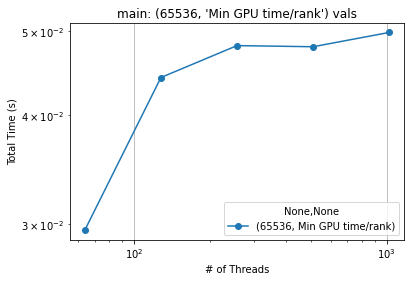

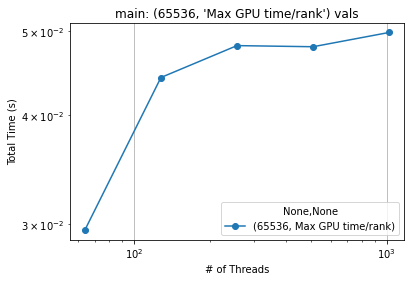

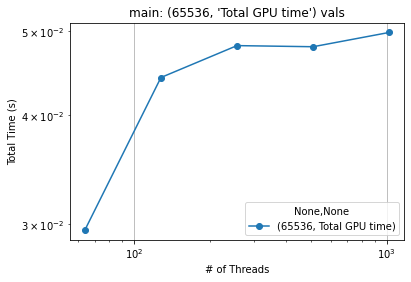

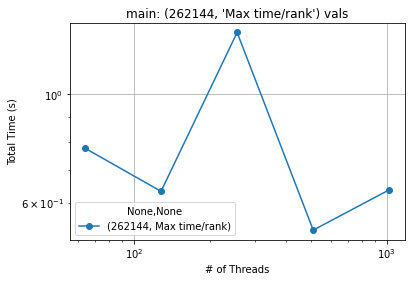

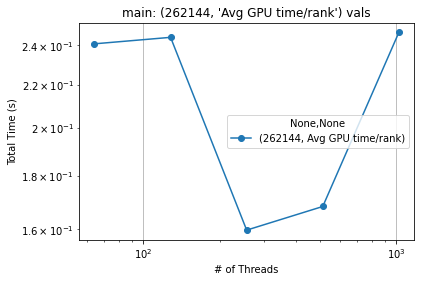

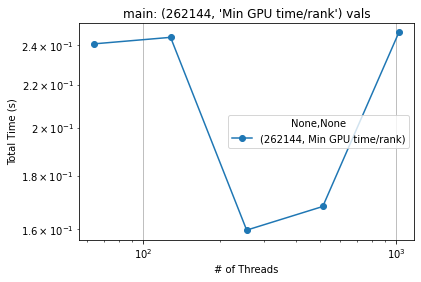

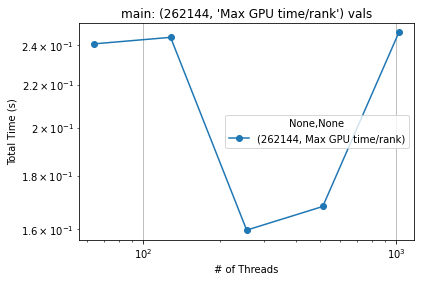

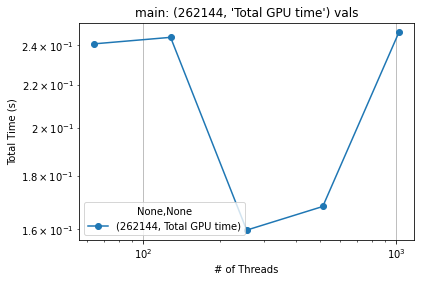

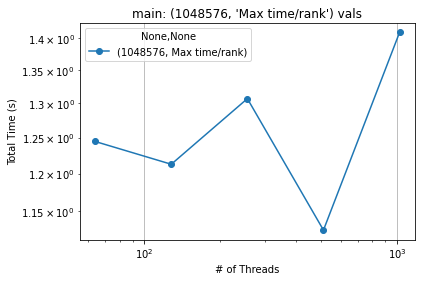

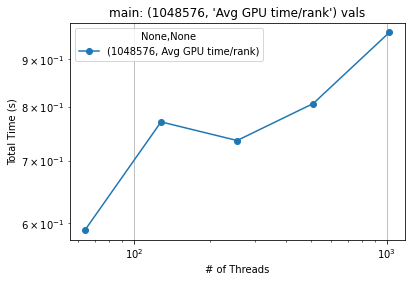

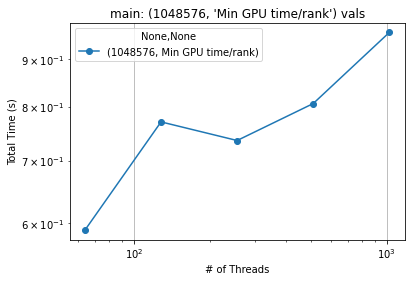

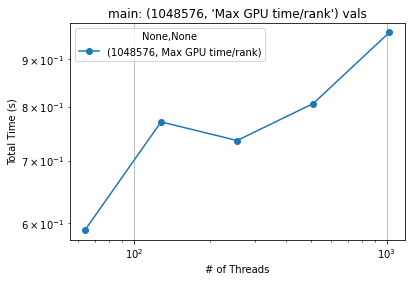

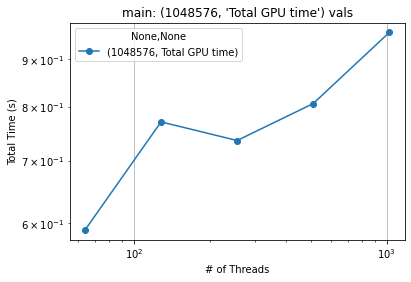

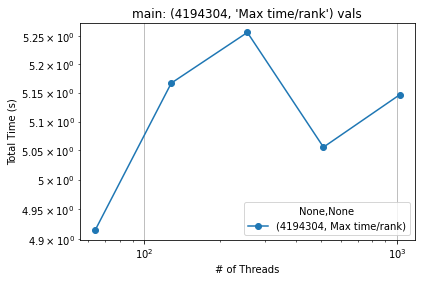

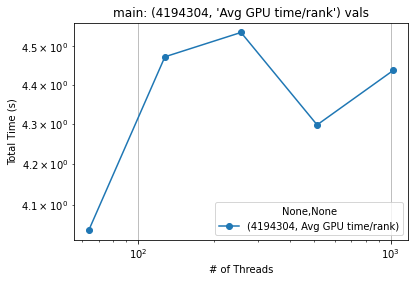

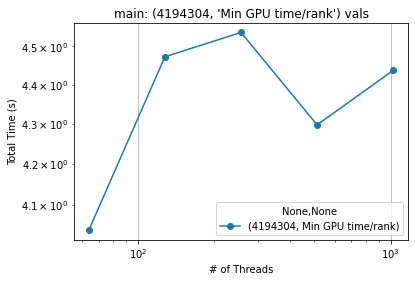

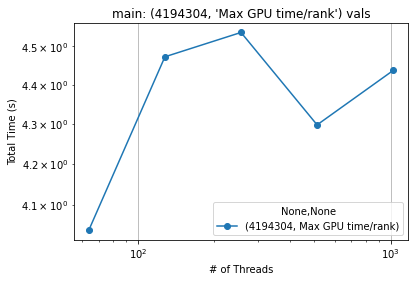

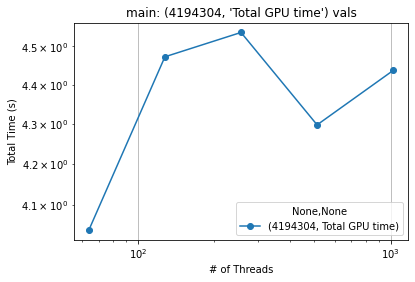

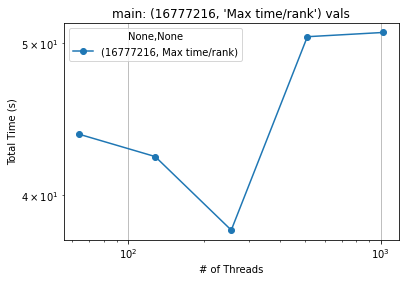

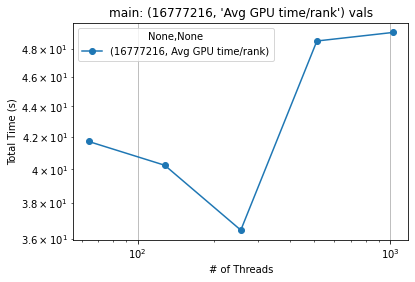

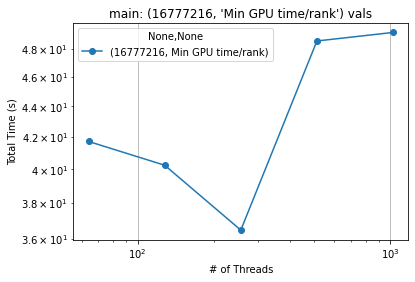

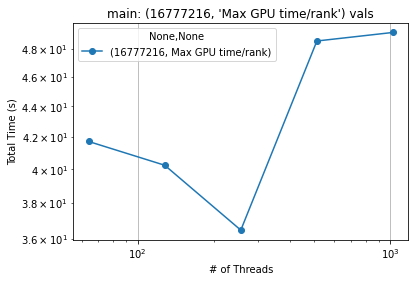

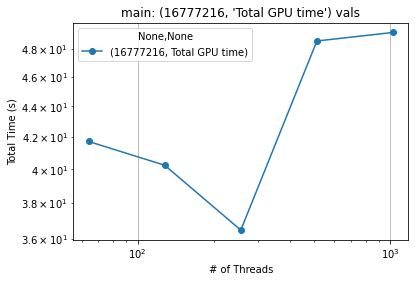

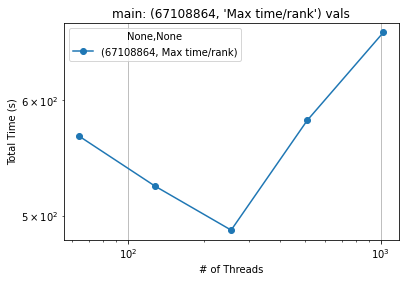

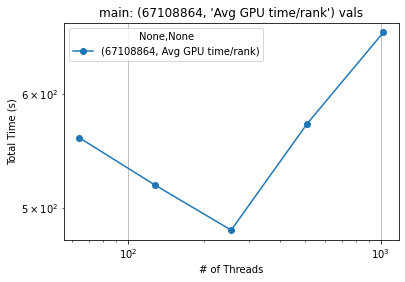

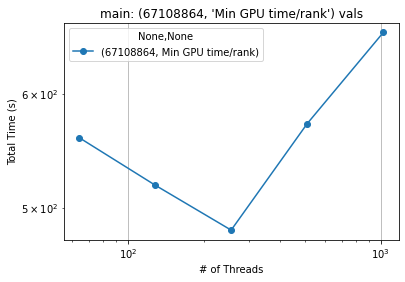

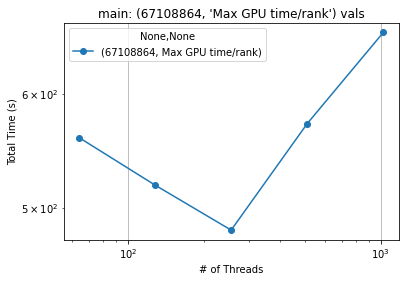

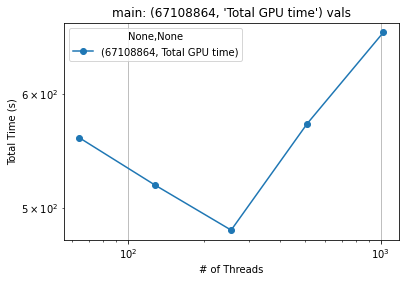

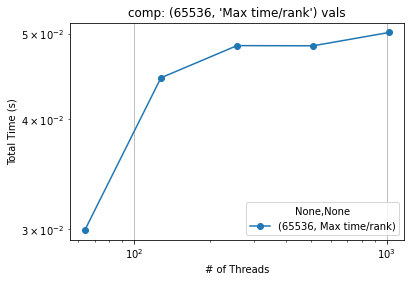

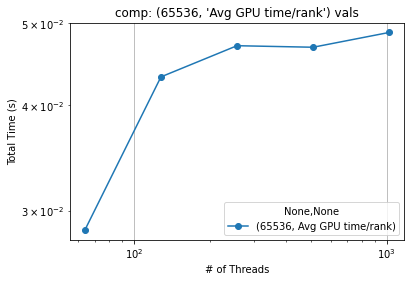

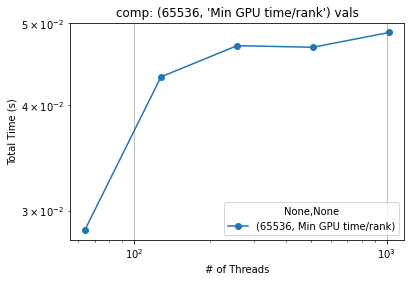

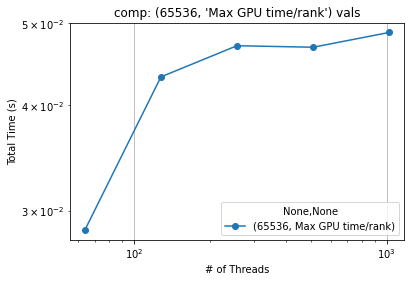

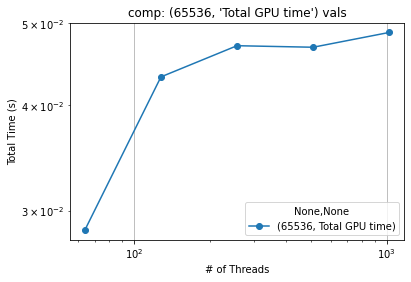

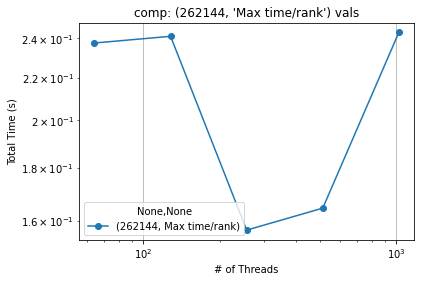

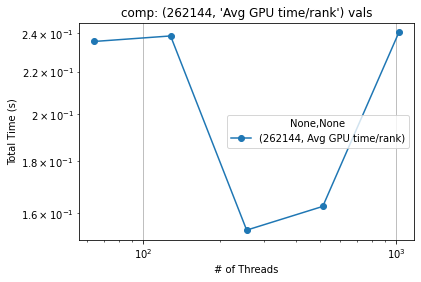

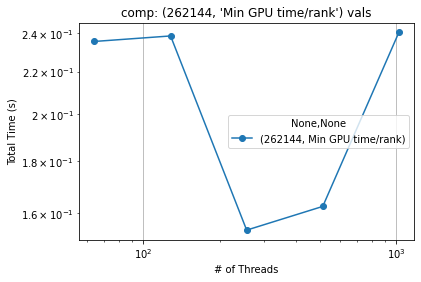

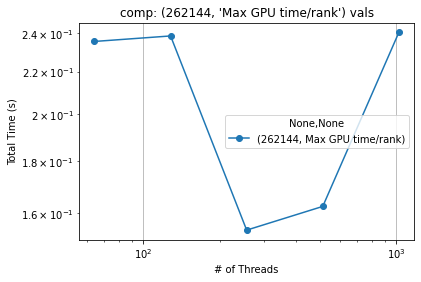

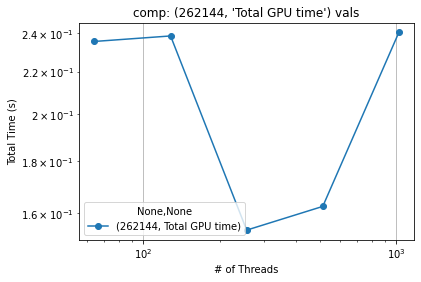

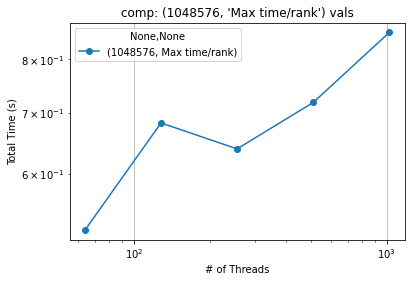

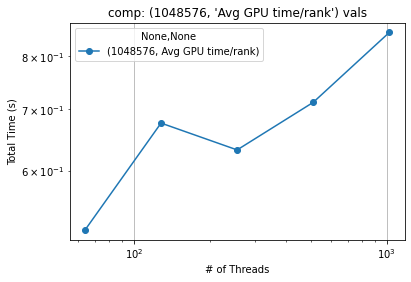

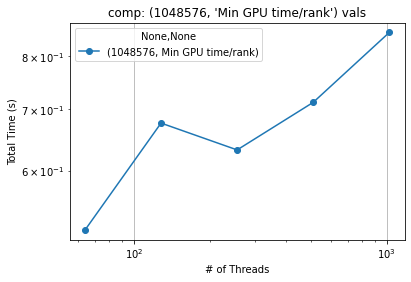

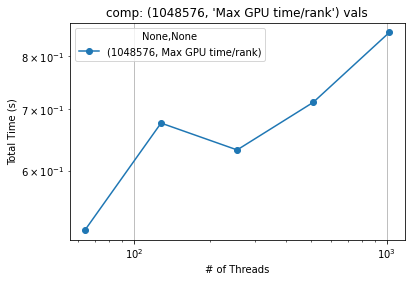

In [ ]:
for name in ["main","comp","comm"]:
    for size in ctk_CUDA.dataframe.columns:
        plot_pandas(
            df=ctk_CUDA.dataframe.loc[name,[size]],
            title=f'{name}: {size} vals',
            xlabel="# of Threads",
            ylabel="Total Time (s)",
            loglog=True
        )

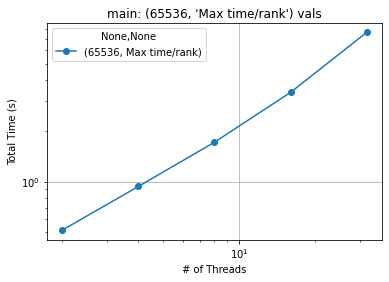

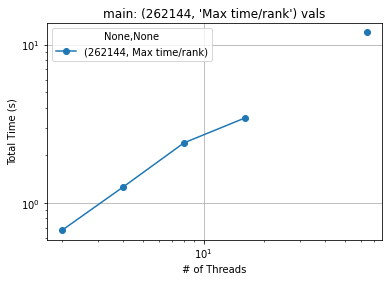

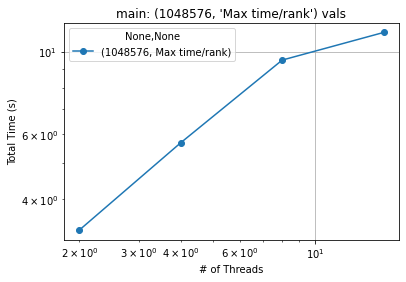

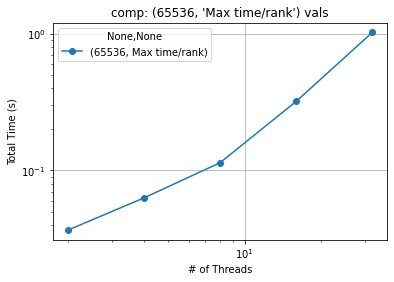

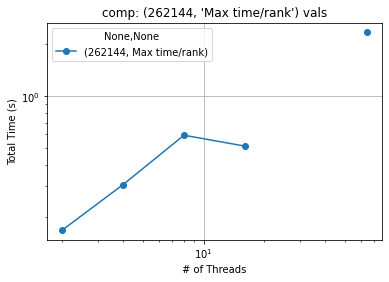

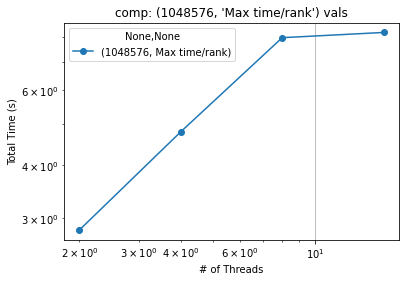

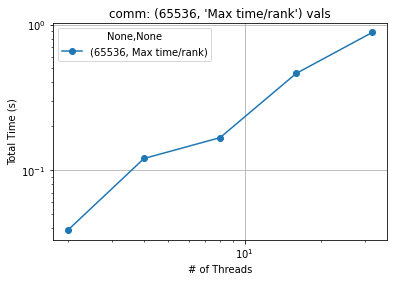

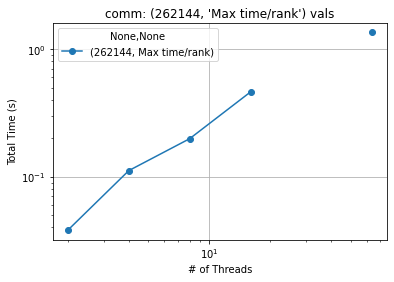

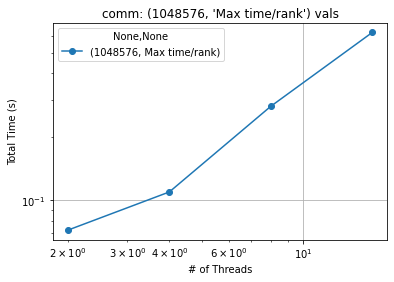

In [24]:
for name in ["main","comp","comm"]:
    for size in ctk_MPI.dataframe.columns:
        plot_pandas(
            df=ctk_MPI.dataframe.loc[name,[size]],
            title=f'{name}: {size} vals',
            xlabel="# of Threads",
            ylabel="Total Time (s)",
            loglog=True
        )